## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

###  Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing all datasets
lead= pd.read_csv("Leads.csv")
lead.head(-1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.50,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent


###  Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##  EXPLORATORY DATA ANALYSIS

###  Data Preparation

#### Check percentage of null values in each column 

In [8]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#checking percentage of null values in each column

round(100*((lead.isnull().sum())/len(lead)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#no null values present
sum(lead.duplicated(subset='Prospect ID'))==0

True

In [11]:
#no null values present
sum(lead.duplicated(subset='Lead Number'))==0

True

In [12]:
# Prospect ID  and Lead Number are unique no and given to customer can be droppedd fromm the dataset
lead.drop(['Lead Number','Prospect ID'],1,inplace=True)

In [13]:
#Converting 'Select' values to NaN.

lead = lead.replace('Select', np.nan)


In [14]:
#finding unique values
lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [15]:
# drop the columns having minimum no of unique value of one 
lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)



### discard the columns having more than 45%


In [16]:
#get columns
cols=lead.columns

In [17]:

#dropping cols with more than 45% missing values
for i  in cols:
    if(100*((lead[i].isnull().sum())/len(lead))>=45):
        lead.drop(i,1,inplace=True)

In [18]:
#checking percentage of null values in each column
round(100*((lead.isnull().sum())/len(lead)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [19]:
# replace all null with not provided

lead['Specialization'] = lead['Specialization'].fillna('not provided')
lead['City'] = lead['City'].fillna('not provided')
lead['Tags'] = lead['Tags'].fillna('not provided')
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('not provided')
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('not provided')
lead['Country'] = lead['Country'].fillna('not provided')
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [20]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [21]:
# finding shape of dataset

lead.shape

(9240, 23)

## categorical variable analysis


In [22]:
# extract all the columns 
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [23]:
# check which countries
lead['Country'].unique()

array(['not provided', 'India', 'Russia', 'Kuwait', 'Oman',
       'United Arab Emirates', 'United States', 'Australia',
       'United Kingdom', 'Bahrain', 'Ghana', 'Singapore', 'Qatar',
       'Saudi Arabia', 'Belgium', 'France', 'Sri Lanka', 'China',
       'Canada', 'Netherlands', 'Sweden', 'Nigeria', 'Hong Kong',
       'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya', 'Italy',
       'South Africa', 'Tanzania', 'unknown', 'Malaysia', 'Liberia',
       'Switzerland', 'Denmark', 'Philippines', 'Bangladesh', 'Vietnam',
       'Indonesia'], dtype=object)

In [24]:
lead['Country'].value_counts(dropna=False)

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [25]:
# replace not provided with india
lead['Country']=lead['Country'].replace('not provided','India')

In [26]:
# get count of countries in country column
lead['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [27]:
# percentage of india students contributes maximum
(8953/(lead['Country'].value_counts(dropna=False).sum()))*100
# 96.89% is maximum contributor. Hence can be dropped.

96.8939393939394

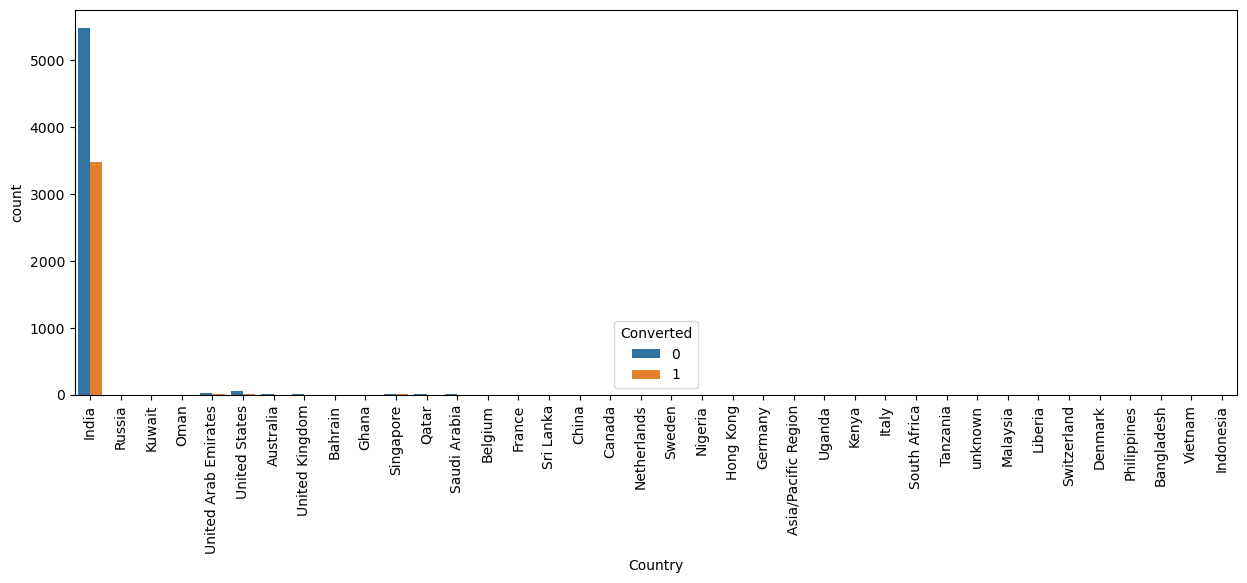

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

s1=sns.countplot(lead.Country, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
# the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [30]:
#drop the column country
lead.drop(['Country'],1,inplace=True)

In [31]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 9240 

#### check the details of city column

In [32]:
lead['City'].value_counts(dropna=False)

not provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
# replace the nan values with Mumbai as majority of values are Mumbai

lead['City']=lead['City'].replace('not provided','Mumbai')

In [34]:
lead['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

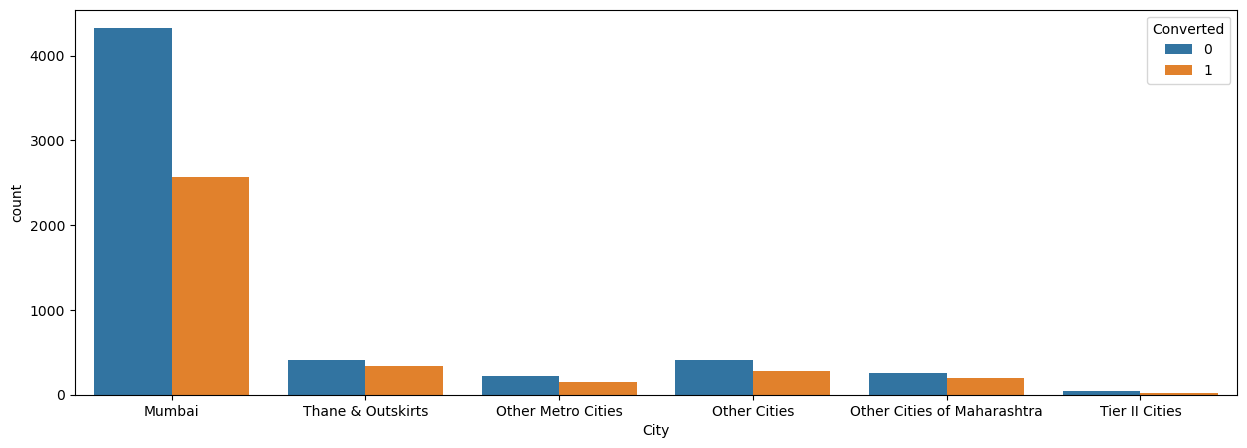

In [35]:
# #plotting spread of City columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(lead.City,hue=lead.Converted)

plt.show

#### check details of Tags column

In [36]:
# check with tag column for nan values and its distribution for converted or not
lead['Tags'].value_counts(dropna=False)

not provided                                         3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
# since not provided values are more in percentage so it can not be dropped
3353/len(lead)*100

36.28787878787879

In [38]:
#replacing tags with low frequency with "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA','others'] , 'Other_Tags')

In [39]:
# tags is the column 
lead['Tags'].value_counts(dropna=False)

not provided                           3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

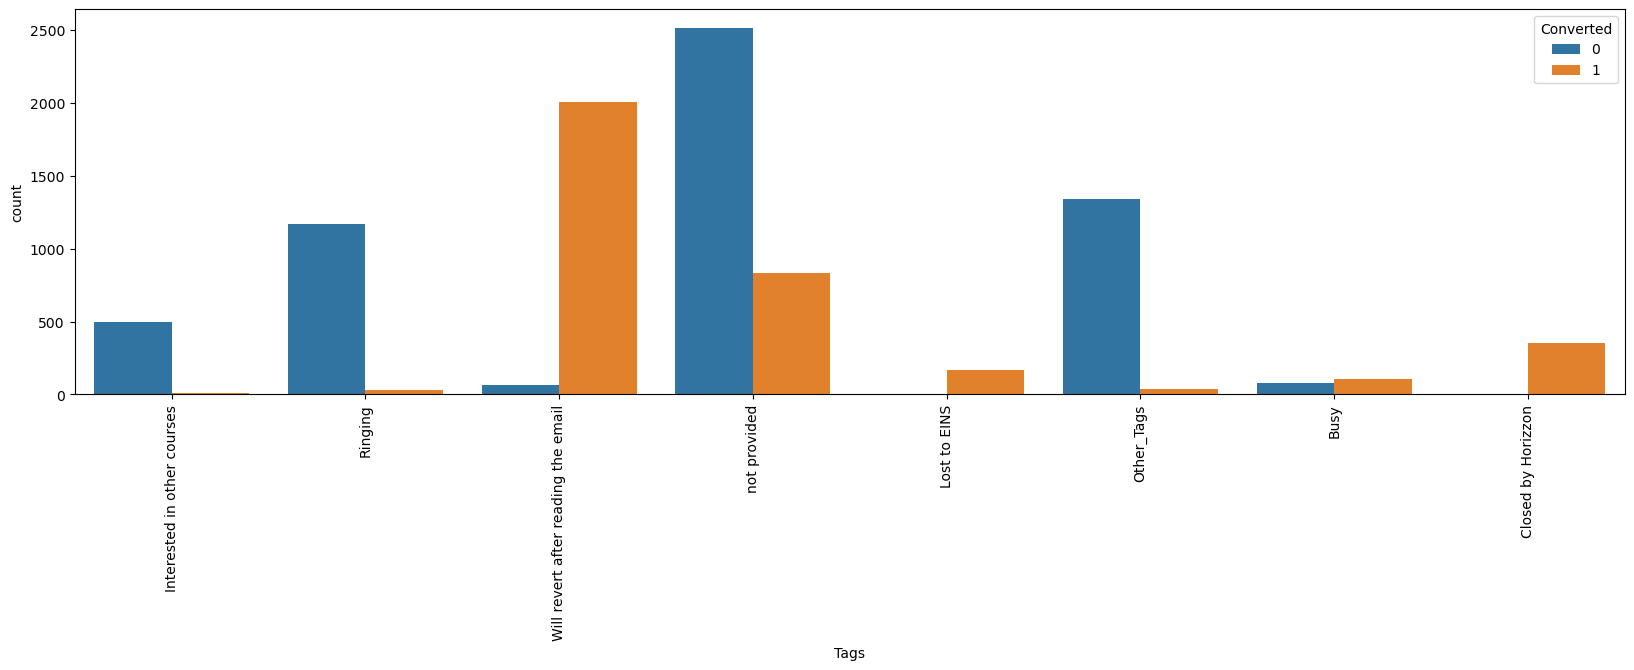

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
#s1=sns.countplot(lead.Country)
s1=sns.countplot(lead.Tags, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### check details of lead source

In [41]:
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
lead['Lead Source']=lead['Lead Source'].replace(np.nan,'Google')

In [43]:
lead['Lead Source']=lead['Lead Source'].replace('google','Google')

In [44]:
lead['Lead Source']=lead['Lead Source'].replace(['NC_EDM','testone','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','bing','Click2call','Social Media','Live Chat','Press_Release'],'OTHERS')

In [45]:

lead['Lead Source']=lead['Lead Source'].replace('OTHERS','OTHERS_Lead_Source')

In [46]:
lead['Lead Source'].value_counts(dropna=False)

Google                2909
Direct Traffic        2543
Olark Chat            1755
Organic Search        1154
Reference              534
Welingak Website       142
Referral Sites         125
Facebook                55
OTHERS_Lead_Source      23
Name: Lead Source, dtype: int64

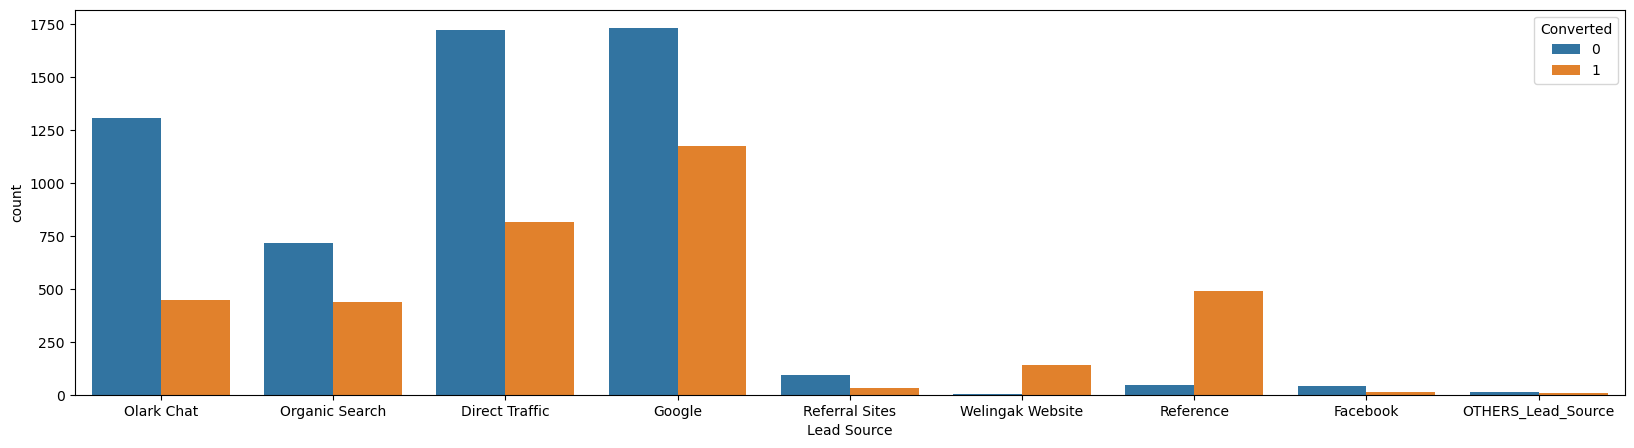

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
s1=sns.countplot(lead['Lead Source'],hue=lead.Converted)
#s1.set_xticklabel(s1.get_xticklabel,rotation=90)
plt.show()

#### check details of lead Origin

In [48]:
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [49]:
lead['Lead Origin']=lead['Lead Origin'].replace('Quick Add Form','Landing Page Submission')

In [50]:
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4887
API                        3580
Lead Add Form               718
Lead Import                  55
Name: Lead Origin, dtype: int64

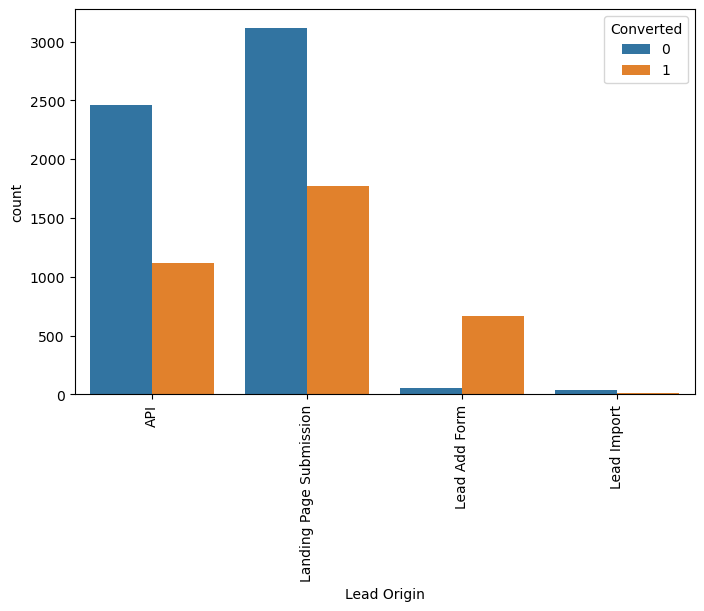

In [51]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(lead['Lead Origin'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### check details of Do Not Email


In [52]:
lead['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [53]:
734/9000*100

8.155555555555557

In [54]:
8506/9000*100

94.5111111111111

In [55]:
#since there are 94% of values which are giving result 'no' hence this columnn can be droped
lead.drop(['Do Not Email'],1,inplace=True)

#### check details of Do not call

In [56]:
lead['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [57]:
#since more than 95% of values are giving 'no' response the column can be dropped
lead.drop(['Do Not Call'],1,inplace=True)

In [58]:
lead.nunique()

Lead Origin                                         4
Lead Source                                         9
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
Tags                                                8
City                                                6
A free copy of Mastering The

#### Search 

In [59]:
lead['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [60]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['Search'],1,inplace=True)

#### Newspaper Article 

In [61]:
lead['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [62]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['Newspaper Article'],1,inplace=True)

#### X Education Forums 

In [63]:
lead['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [64]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['X Education Forums'],1,inplace=True)

#### Newspaper

In [65]:
lead['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [66]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['Newspaper'],1,inplace=True)

#### Digital Advertisement 

In [67]:
lead['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [68]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['Digital Advertisement'],1,inplace=True)

#### Through Recommendations

In [69]:
lead['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [70]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['Through Recommendations'],1,inplace=True)

#### A free copy of Mastering The Interview

In [71]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [72]:
#since one value has more weitage than 95% this column has to be dropped
lead.drop(['A free copy of Mastering The Interview'],1,inplace=True)

In [73]:
lead.nunique()

Lead Origin                                         4
Lead Source                                         9
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Tags                                                8
City                                                6
Last Notable Activity                              16
dtype: int64

In [74]:
len(lead.columns)

13

####  check details of Specialization

In [75]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

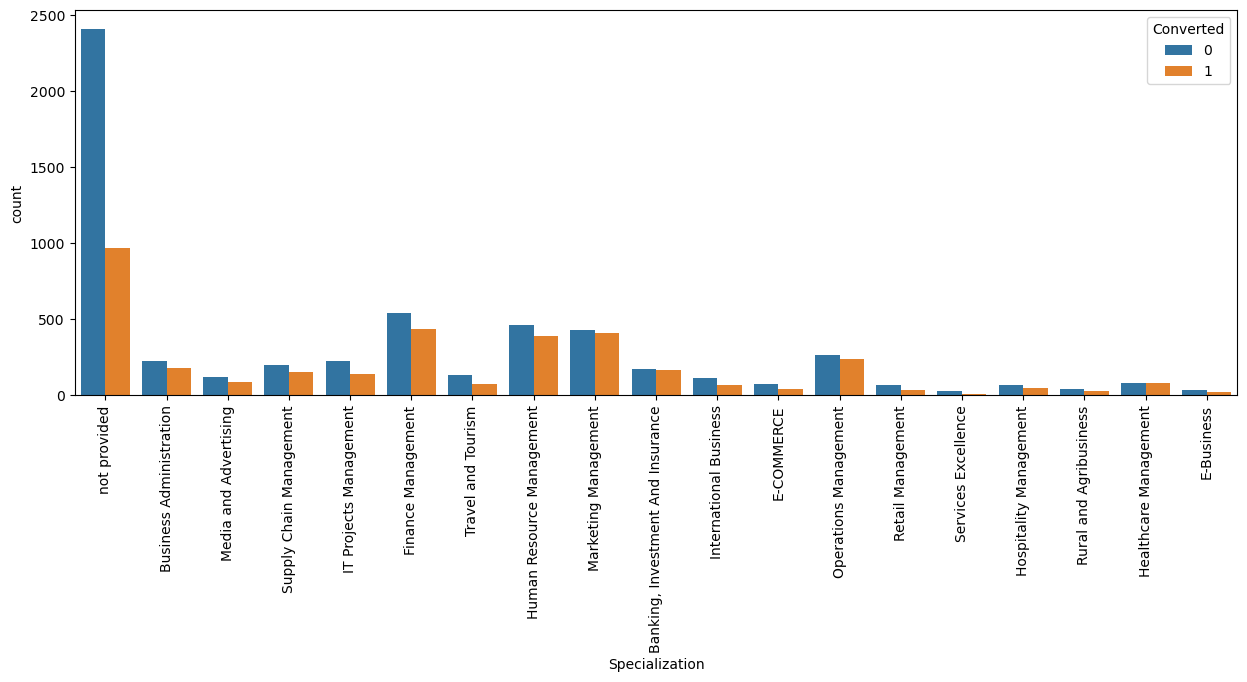

In [76]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [77]:
# specialization with Management have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [78]:
#combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

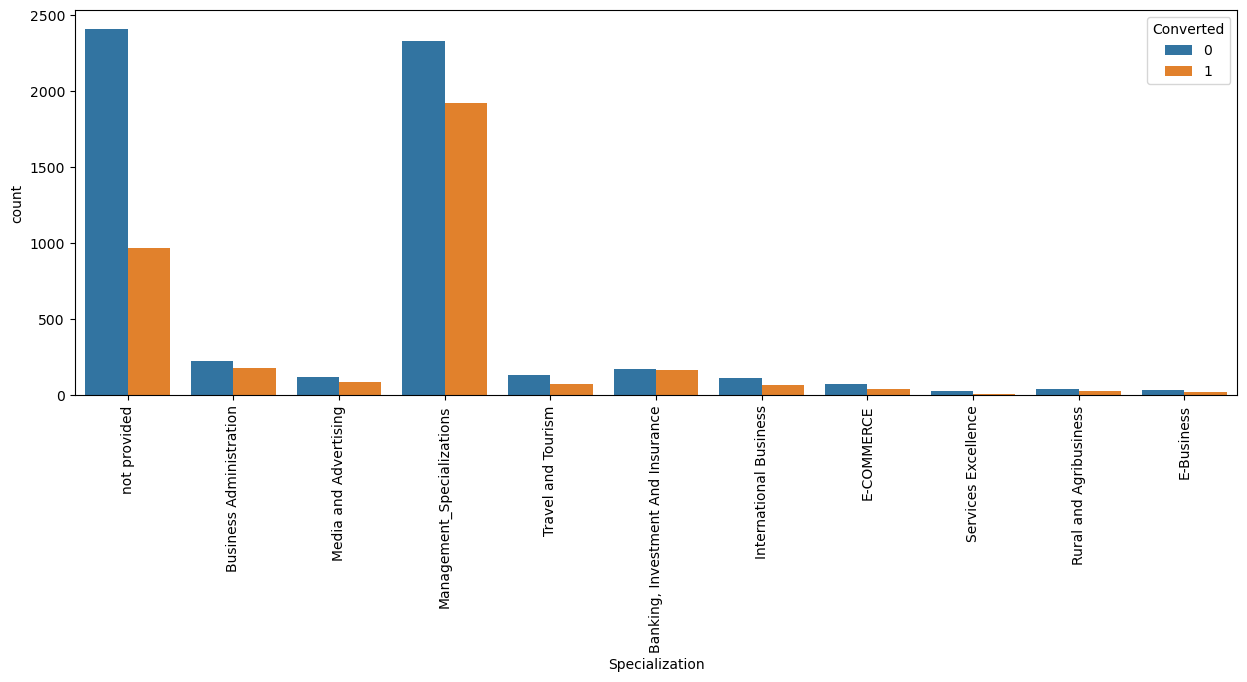

In [79]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [80]:
#What is your current occupation
lead['What is your current occupation']=lead['What is your current occupation'].replace('Other','Other occupation')

lead['What is your current occupation'].value_counts(dropna=False)


Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other occupation          16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

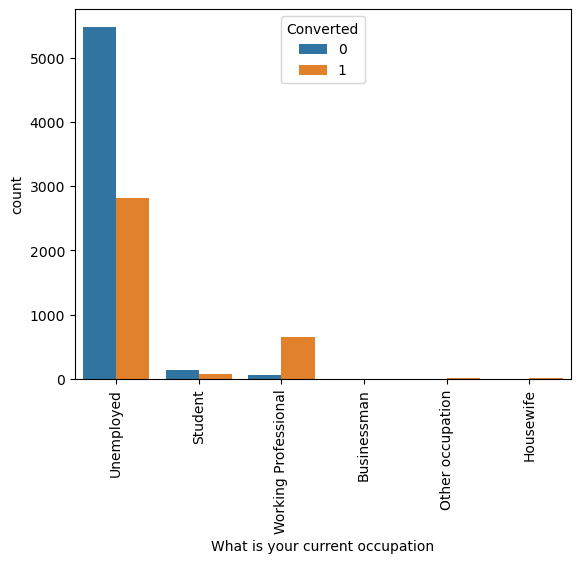

In [81]:
#imputing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace('not provided', 'Unemployed')
#What is your current occupation

lead['What is your current occupation'].value_counts(dropna=False)
#visualizing count of Variable based on Converted value

s1=sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [82]:
#Inference from above graph
#   1) Working Professionals going for the course have high chances of joining it.
#    2) Unemployed leads are the most in terms of Absolute numbers.

#### check details of what matters to you in choosing this course

In [83]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

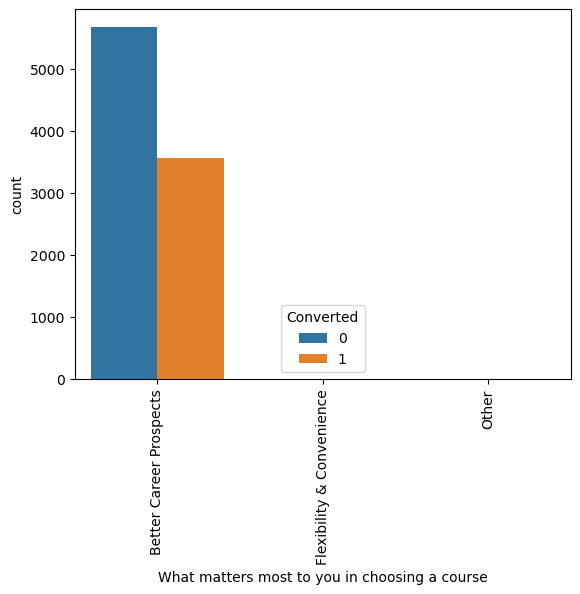

In [84]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace('not provided','Better Career Prospects')
#visualizing count of Variable based on Converted value

s1=sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [85]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [86]:
#since 99% of values belong to better career prospects this columnn can be dropped
lead.drop(['What matters most to you in choosing a course'],1,inplace=True)

#### last activity

In [87]:
#checking value counts

lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [88]:
#We can group some of the lower frequency occuring labels under a common label 'Others'

In [89]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others_last_activity')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others_last_activity')

In [90]:
#checking value counts

lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others_last_activity          308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

#### Last Notable Activity   

In [91]:
#checking value counts

lead['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [92]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [93]:
#checking value counts

lead['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

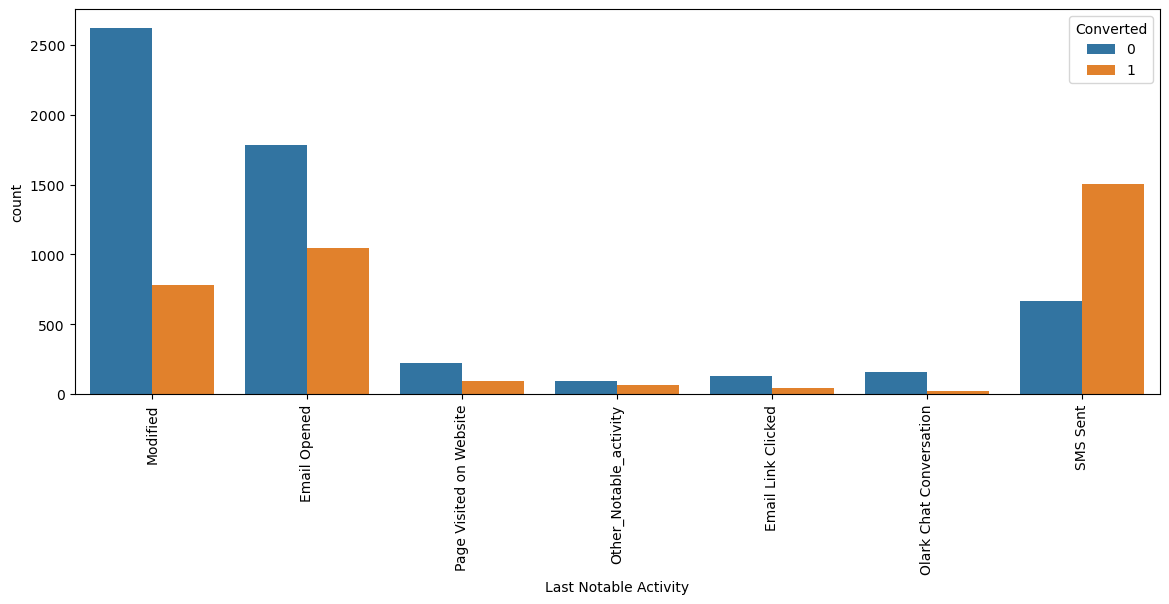

In [94]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

## handling numerical variables

In [95]:
#Check the Null Values in All Columns:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                        0.00
Lead Source                        0.00
Converted                          0.00
TotalVisits                        1.48
Total Time Spent on Website        0.00
Page Views Per Visit               1.48
Last Activity                      0.00
Specialization                     0.00
What is your current occupation    0.00
Tags                               0.00
City                               0.00
Last Notable Activity              0.00
dtype: float64

In [96]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9103 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9103 non-null   float64
 6   Last Activity                    9240 non-null   object 
 7   Specialization                   9240 non-null   object 
 8   What is your current occupation  9240 non-null   object 
 9   Tags                             9240 non-null   object 
 10  City                             9240 non-null   object 
 11  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64

In [97]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,not provided,Unemployed,Interested in other courses,Mumbai,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,not provided,Unemployed,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others_last_activity,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,not provided,Unemployed,Will revert after reading the email,Mumbai,Modified


In [98]:
lead['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

In [99]:
len(lead['Converted'])

9240

In [100]:
#percentage of leads converted to aadmision
converted=round(sum(lead['Converted'])/len(lead['Converted'])*100,2)
converted

38.54

In [101]:
lead['TotalVisits'].isnull().sum()

137

In [102]:
lead['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [103]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

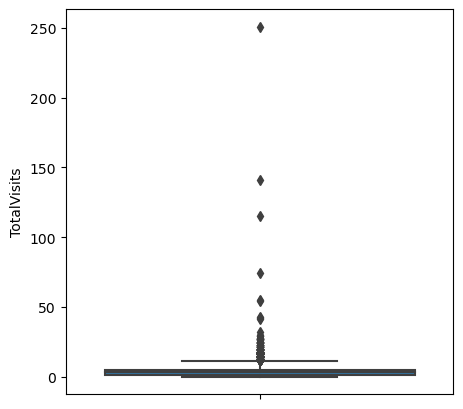

In [104]:
plt.figure(figsize = (5,5))
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [105]:
#checking percentile values for "Total Visits"

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

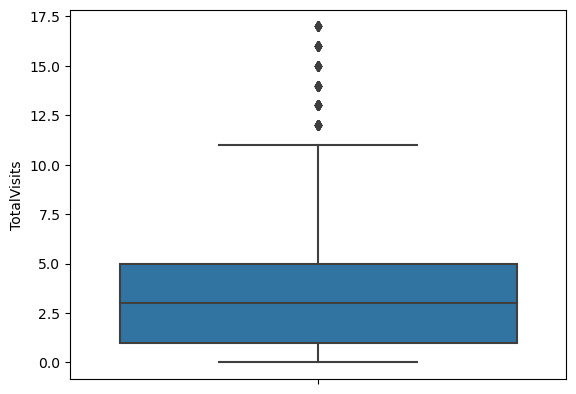

In [106]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [107]:
# nan values / outliers are handled here
lead['TotalVisits'].value_counts(dropna=False)

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
17.0      16
Name: TotalVisits, dtype: int64

#### Checking the Next Numerical Column:

In [108]:
lead['Total Time Spent on Website'].value_counts(dropna=False)

0       2193
60        19
75        18
127       18
234       17
        ... 
1509       1
1407       1
1673       1
732        1
1845       1
Name: Total Time Spent on Website, Length: 1713, dtype: int64

In [109]:
lead['Total Time Spent on Website'].isnull().sum()

0

In [110]:
lead['Total Time Spent on Website'].describe()

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
25%         7.000000
50%       243.000000
75%       915.250000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

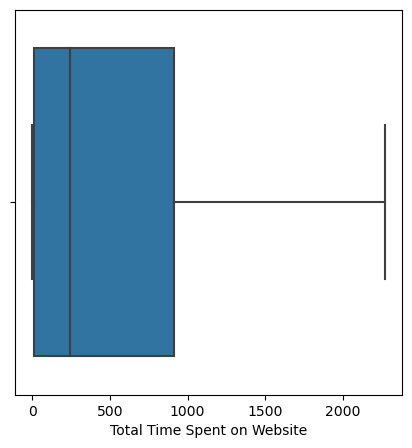

In [111]:
plt.figure(figsize=(5,5))
sns.boxplot(lead['Total Time Spent on Website'])
plt.show()
# since there are no outliers we dont need to do anything

#### Checking Correlation coefficient

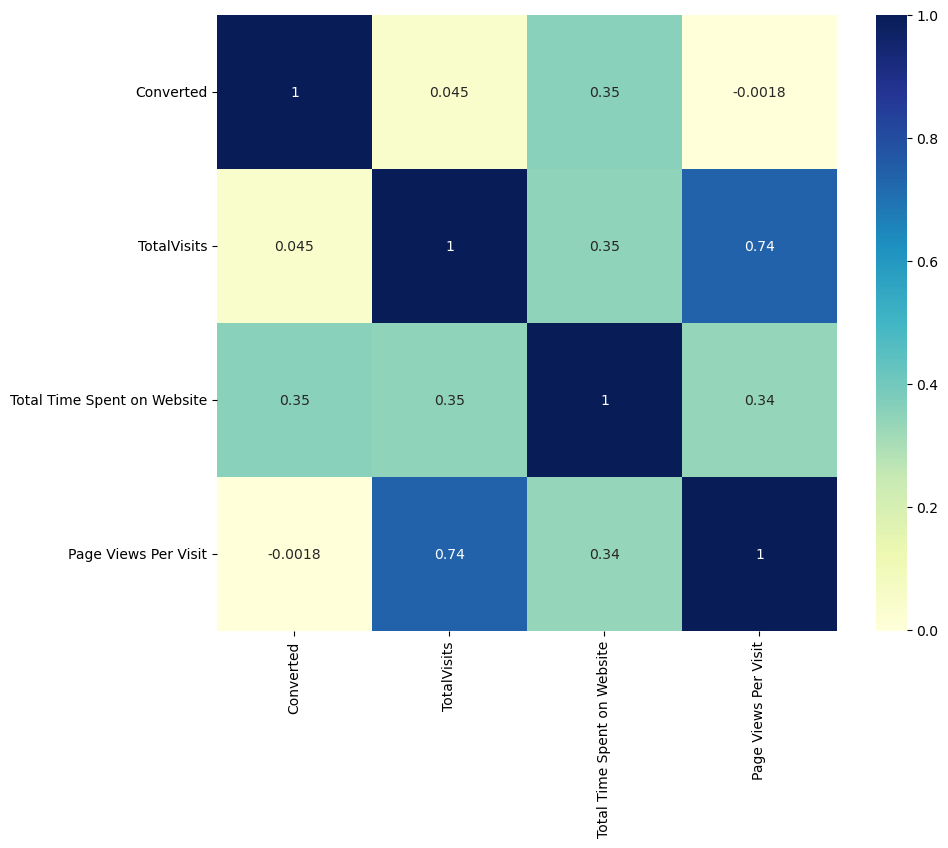

In [112]:
#### finding the correlation among the numeric variables

# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [113]:
lead['Page Views Per Visit'].isnull().sum()


0

In [114]:
lead['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1792
3.00    1193
4.00     893
1.00     651
        ... 
1.31       1
2.13       1
2.14       1
1.63       1
1.17       1
Name: Page Views Per Visit, Length: 73, dtype: int64

In [115]:
lead['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

#### handling outliers

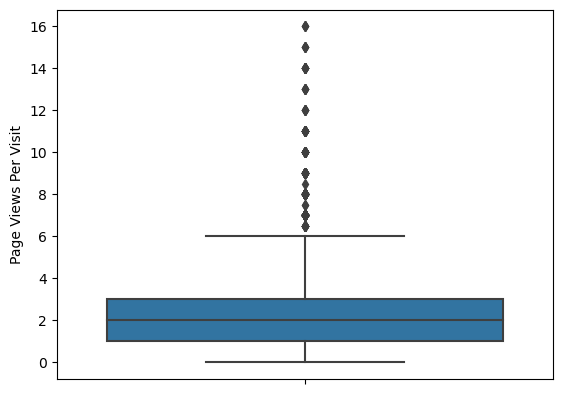

In [116]:
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

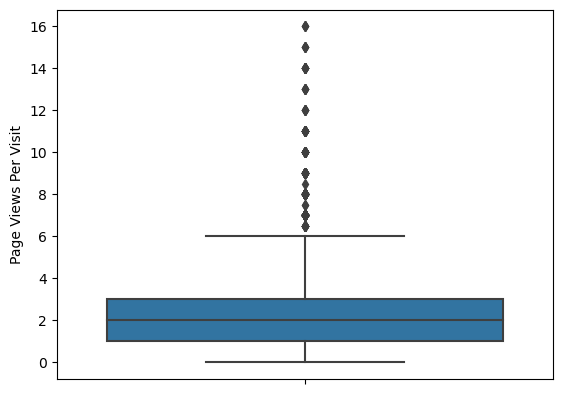

In [117]:
#managing the outliers

Q3 = lead['Page Views Per Visit'].quantile(0.99)
leads = lead[lead['Page Views Per Visit']<= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit']>= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

#Outlier Treatment: Remove top & bottom 1% 

In [118]:
lead.shape

(9020, 12)

In [119]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9020 non-null   object 
 1   Lead Source                      9020 non-null   object 
 2   Converted                        9020 non-null   int64  
 3   TotalVisits                      9020 non-null   float64
 4   Total Time Spent on Website      9020 non-null   int64  
 5   Page Views Per Visit             9020 non-null   float64
 6   Last Activity                    9020 non-null   object 
 7   Specialization                   9020 non-null   object 
 8   What is your current occupation  9020 non-null   object 
 9   Tags                             9020 non-null   object 
 10  City                             9020 non-null   object 
 11  Last Notable Activity            9020 non-null   object 
dtypes: float64(2), int64

In [120]:
#no missing values are present from above

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

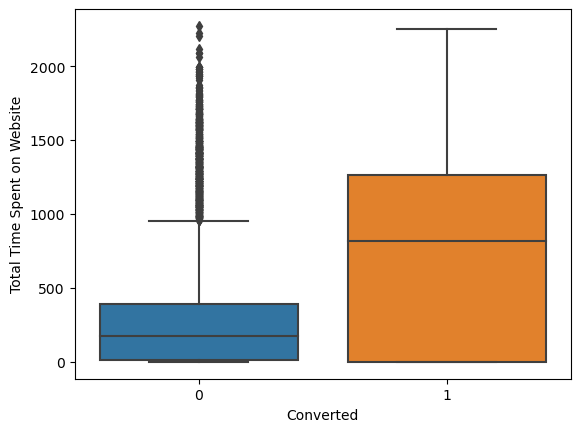

In [121]:
sns.boxplot(x=lead.Converted,y=lead['Total Time Spent on Website'])

In [122]:
# inferences
#  1) more time spent on wesite increses the chances of enrollment
#   2) more engaging content should be created on website

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

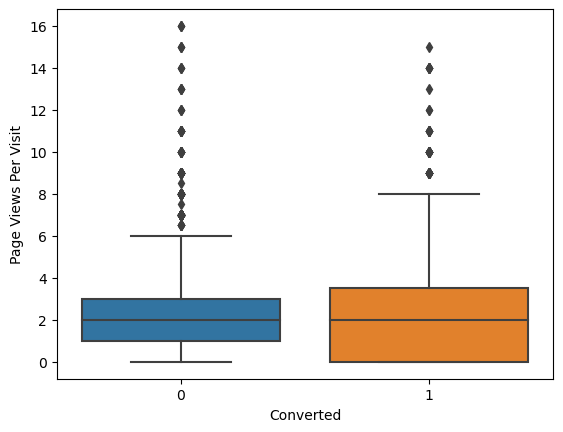

In [123]:
sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])

In [124]:
#Inference
#nothing conclusive from above

## Creating dummy variables

In [125]:
#getting a list of categorical columns

cols=lead.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [126]:
lead['Specialization'].value_counts(dropna=False)

Management_Specializations           4161
not provided                         3293
Business Administration               393
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
E-COMMERCE                            110
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

In [127]:
dummy=pd.get_dummies(lead['Specialization'],prefix='Specialization')
#after prefix the not provided becomes Specialization_not provided
dummy=dummy.drop(['Specialization_not provided'],1)
dummy
lead=pd.concat([lead,dummy],axis=1)

In [128]:
lead['Tags'].value_counts(dropna=False)

not provided                           3308
Will revert after reading the email    2017
Other_Tags                             1368
Ringing                                1173
Interested in other courses             506
Closed by Horizzon                      292
Busy                                    185
Lost to EINS                            171
Name: Tags, dtype: int64

In [129]:
dummy=pd.get_dummies(lead['Tags'],prefix='Tags')
dummy=dummy.drop('Tags_not provided',1)

lead=pd.concat([lead,dummy],axis=1)

In [130]:
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4820
API                        3562
Lead Add Form               607
Lead Import                  31
Name: Lead Origin, dtype: int64

In [131]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8112
Working Professional     672
Student                  206
Other occupation          13
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [132]:
lead['City'].value_counts(dropna=False)

Mumbai                         6726
Thane & Outskirts               732
Other Cities                    671
Other Cities of Maharashtra     446
Other Metro Cities              372
Tier II Cities                   73
Name: City, dtype: int64

In [133]:
lead['Lead Source'].value_counts(dropna=False)

Google                2884
Direct Traffic        2512
Olark Chat            1751
Organic Search        1125
Reference              442
Welingak Website       129
Referral Sites         123
Facebook                31
OTHERS_Lead_Source      23
Name: Lead Source, dtype: int64

In [134]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3415
SMS Sent                     2722
Olark Chat Conversation       970
Page Visited on Website       602
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Others_last_activity          191
Form Submitted on Website     115
Name: Last Activity, dtype: int64

In [135]:
lead['Last Notable Activity'].value_counts(dropna=False)

Modified                   3253
Email Opened               2807
SMS Sent                   2159
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Other_Notable_activity      158
Name: Last Notable Activity, dtype: int64

### dummy variables

In [136]:
#create dumy variables
dummy=pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','Last Notable Activity','What is your current occupation','City']],drop_first=True)

dummy=dummy.drop(['Last Notable Activity_Other_Notable_activity'],1)
dummy=dummy.drop(['Last Activity_Others_last_activity'],1)
dummy=dummy.drop(['Lead Source_OTHERS_Lead_Source'],1)


In [137]:
# Add the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)
lead

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,...,What is your current occupation_Housewife,What is your current occupation_Other occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,not provided,Unemployed,Interested in other courses,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.50,Email Opened,not provided,Unemployed,Ringing,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others_last_activity,Media and Advertising,Unemployed,Ringing,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,not provided,Unemployed,Will revert after reading the email,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Others_last_activity,Management_Specializations,Unemployed,Will revert after reading the email,...,0,0,0,1,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Other_Tags,...,0,0,0,1,0,0,0,0,0,0
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Other_Tags,...,0,0,0,1,0,0,0,0,0,0
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Management_Specializations,Unemployed,not provided,...,0,0,0,1,0,0,0,1,0,0


In [138]:
#delete original columns
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],1,inplace=True)


In [139]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,What is your current occupation_Housewife,What is your current occupation_Other occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


##  Test-Train Split

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# Putting feature variable to X
y = lead['Converted']

y.head()

X = lead.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,What is your current occupation_Housewife,What is your current occupation_Other occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [142]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 2873 to 5783
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6314 non-null   float64
 1   Total Time Spent on Website                           6314 non-null   int64  
 2   Page Views Per Visit                                  6314 non-null   float64
 3   Specialization_Banking, Investment And Insurance      6314 non-null   uint8  
 4   Specialization_Business Administration                6314 non-null   uint8  
 5   Specialization_E-Business                             6314 non-null   uint8  
 6   Specialization_E-COMMERCE                             6314 non-null   uint8  
 7   Specialization_International Business                 6314 non-null   uint8  
 8   Specialization_Management_Specializations             6

##  Feature Scaling

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,What is your current occupation_Housewife,What is your current occupation_Other occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2873,0.271781,0.031598,0.814423,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6823,1.276480,2.389158,2.274024,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7258,-1.067817,-0.874028,-1.131710,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8327,1.611379,1.982176,0.167334,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5940,-0.732918,-0.701703,-0.645177,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


## Model Building using Stats Model & RFE:
Let's start by splitting our data into a training set and a test set.

#### Running First Training Model

In [146]:
import statsmodels.api as sm

In [147]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1190.3
Date:                Tue, 18 Jul 2023   Deviance:                       2380.6
Time:                        13:09:22   Pearson chi2:                 9.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.6123
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0675      1.688     -2.410      0.016      -7.376      -0.760
TotalVisits                                              0.2798      0.081      3.436      0.001       0.120       0.439
Total Time Spent on Website                              1.0758      0.063     17.070      0.000       0.952       1.199
Page Views Per Visit                                    -0.1570      0.090     -1.746      0.081      -0.333       0.019
Specialization_Banking, Investment And Insurance         0.3314      0.376      0.883      0.377      -0.405       1.067
Specialization_Business Administration                   0.2467      0.342      0.721      0.471      -0.424       0.917
Specialization_E-Business                                0.3113      0.757      0.411      0.681      -1.171       1.794
Specialization_E-COMMERCE                                0.3437      0.554      0.620      0.535      -0.743       1.430
Specialization_International Business                   -0.4998      0.448     -1.116      0.265      -1.378       0.378
Specialization_Management_Specializations               -0.0242      0.238     -0.102      0.919      -0.491       0.443
Specialization_Media and Advertising                    -0.0545      0.476     -0.115      0.909      -0.987       0.878
Specialization_Rural and Agribusiness                    0.1089      0.679      0.160      0.873      -1.223       1.441
Specialization_Services Excellence                       0.2390      0.848      0.282      0.778      -1.423       1.901
Specialization_Travel and Tourism                       -0.3485      0.509     -0.685      0.493      -1.345       0.648
Tags_Busy                                                1.0260      0.253      4.058      0.000       0.530       1.522
Tags_Closed by Horizzon                                  7.1559      1.046      6.844      0.000       5.107       9.205
Tags_Interested in other courses                        -1.9456      0.390     -4.995      0.000      -2.709      -1.182
Tags_Lost to EINS                                        5.8191      0.614      9.480      0.000       4.616       7.022
Tags_Other_Tags                                         -2.3517      0.223    -10.535      0.000      -2.789      -1.914
Tags_Ringing                                            -3.4052      0.249    -13.669      0.000      -3.894      -2.917
Tags_Will revert after reading the email                 4.4548      0.209     21.295      0.000       4.045       4.865
Lead Origin_Landing Page Submission                     -0.5566      0.241     -2.311      0.021      -1.029      -0.084
Lead Origin_Lead Add Form                                3

## Feature Selection Using RFE

In [148]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [149]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [150]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False])

In [151]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Specialization_Banking, Investment And Insurance', False, 12),
 ('Specialization_Business Administration', False, 17),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_International Business', False, 11),
 ('Specialization_Management_Specializations', False, 37),
 ('Specialization_Media and Advertising', False, 38),
 ('Specialization_Rural and Agribusiness', False, 25),
 ('Specialization_Services Excellence', False, 29),
 ('Specialization_Travel and Tourism', False, 13),
 ('Tags_Busy', False, 3),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Other_Tags', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 (

In [152]:
col = X_train.columns[rfe.support_]

In [153]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Tags_Busy',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Opened',
       'L

##### Assessing the model with StatsModels

In [154]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.2
Date:                Tue, 18 Jul 2023   Deviance:                       2474.4
Time:                        13:09:25   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7331      0.098    -17.694      0.000      -1.925      -1.541
Total Time Spent on Website                              1.0861      0.061     17.816      0.000       0.967       1.206
Tags_Closed by Horizzon                                  7.0204      1.022      6.871      0.000       5.018       9.023
Tags_Interested in other courses                        -1.9839      0.390     -5.084      0.000      -2.749      -1.219
Tags_Lost to EINS                                        5.7396      0.609      9.417      0.000       4.545       6.934
Tags_Other_Tags                                         -2.5280      0.214    -11.786      0.000      -2.948      -2.108
Tags_Ringing                                            -3.5925      0.249    -14.434      0.000      -4.080      -3.105
Tags_Will revert after reading the email                 4.3023      0.193     22.306      0.000       3.924       4.680
Lead Origin_Lead Add Form                                2.0653      0.429      4.812      0.000       1.224       2.907
Lead Source_Olark Chat                                   1.1550      0.146      7.915      0.000       0.869       1.441
Lead Source_Welingak Website                             3.4668      0.845      4.103      0.000       1.811       5.123
Last Activity_Email Bounced                             -1.1787      0.495     -2.383      0.017      -2.148      -0.209
Last Activity_SMS Sent                                   1.5196      0.225      6.748      0.000       1.078       1.961
Last Notable Activity_Modified                          -1.4020      0.158     -8.892      0.000      -1.711      -1.093
Last Notable Activity_SMS Sent                           0.7671      0.258      2.976      0.003       0.262       1.272
What is your current occupation_Working Professional     1.0752      0.402      2.675      0.007       0.287       1.863
========================================================================================================================
"""

In [155]:
#p-value of variable Last Activity_Email Bounced is high, so we can drop it.

In [156]:
col = col.drop('Last Activity_Email Bounced', 1)
col

Index(['Total Time Spent on Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [157]:
# model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.7
Date:                Tue, 18 Jul 2023   Deviance:                       2481.4
Time:                        13:09:25   Pearson chi2:                 9.96e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7550      0.098    -17.951      0.000      -1.947      -1.563
Total Time Spent on Website                              1.0841      0.061     17.847      0.000       0.965       1.203
Tags_Closed by Horizzon                                  7.0767      1.022      6.924      0.000       5.073       9.080
Tags_Interested in other courses                        -1.9860      0.391     -5.079      0.000      -2.752      -1.220
Tags_Lost to EINS                                        5.7655      0.609      9.473      0.000       4.573       6.958
Tags_Other_Tags                                         -2.5243      0.214    -11.784      0.000      -2.944      -2.104
Tags_Ringing                                            -3.5859      0.249    -14.410      0.000      -4.074      -3.098
Tags_Will revert after reading the email                 4.3246      0.193     22.442      0.000       3.947       4.702
Lead Origin_Lead Add Form                                2.0747      0.430      4.830      0.000       1.233       2.917
Lead Source_Olark Chat                                   1.1668      0.146      8.006      0.000       0.881       1.452
Lead Source_Welingak Website                             3.4798      0.846      4.114      0.000       1.822       5.138
Last Activity_SMS Sent                                   1.6000      0.224      7.154      0.000       1.162       2.038
Last Notable Activity_Modified                          -1.4629      0.156     -9.370      0.000      -1.769      -1.157
Last Notable Activity_SMS Sent                           0.7049      0.257      2.744      0.006       0.201       1.208
What is your current occupation_Working Professional     1.0410      0.393      2.648      0.008       0.270       1.812
========================================================================================================================
"""

### Checking VIFs

In [158]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.04
10,Last Activity_SMS Sent,5.89
7,Lead Origin_Lead Add Form,1.85
11,Last Notable Activity_Modified,1.83
6,Tags_Will revert after reading the email,1.82
0,Total Time Spent on Website,1.45
8,Lead Source_Olark Chat,1.39
9,Lead Source_Welingak Website,1.34
13,What is your current occupation_Working Profes...,1.31
1,Tags_Closed by Horizzon,1.23


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [160]:
col = col.drop('Last Notable Activity_SMS Sent', 1)
col

Index(['Total Time Spent on Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [161]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.5
Date:                Tue, 18 Jul 2023   Deviance:                       2489.0
Time:                        13:09:26   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6056
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7049      0.095    -17.930      0.000      -1.891      -1.519
Total Time Spent on Website                              1.0790      0.060     17.840      0.000       0.960       1.198
Tags_Closed by Horizzon                                  7.2521      1.022      7.095      0.000       5.249       9.255
Tags_Interested in other courses                        -1.9529      0.391     -4.994      0.000      -2.719      -1.186
Tags_Lost to EINS                                        5.9188      0.610      9.708      0.000       4.724       7.114
Tags_Other_Tags                                         -2.4768      0.212    -11.685      0.000      -2.892      -2.061
Tags_Ringing                                            -3.4929      0.244    -14.303      0.000      -3.972      -3.014
Tags_Will revert after reading the email                 4.3924      0.195     22.539      0.000       4.010       4.774
Lead Origin_Lead Add Form                                2.0481      0.431      4.756      0.000       1.204       2.892
Lead Source_Olark Chat                                   1.1783      0.145      8.140      0.000       0.895       1.462
Lead Source_Welingak Website                             3.4791      0.849      4.099      0.000       1.816       5.143
Last Activity_SMS Sent                                   2.1258      0.116     18.296      0.000       1.898       2.354
Last Notable Activity_Modified                          -1.7346      0.127    -13.669      0.000      -1.983      -1.486
What is your current occupation_Working Professional     1.0378      0.389      2.666      0.008       0.275       1.801
========================================================================================================================
"""

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Lead Add Form,1.85
6,Tags_Will revert after reading the email,1.77
11,Last Notable Activity_Modified,1.48
10,Last Activity_SMS Sent,1.46
0,Total Time Spent on Website,1.45
8,Lead Source_Olark Chat,1.36
9,Lead Source_Welingak Website,1.34
12,What is your current occupation_Working Profes...,1.31
1,Tags_Closed by Horizzon,1.23
4,Tags_Other_Tags,1.14


In [163]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.998667
6823    0.999384
7258    0.039005
8327    0.992047
5940    0.014823
5686    0.998902
5372    0.999717
4736    0.034601
5812    0.997415
893     0.032918
dtype: float64

In [164]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99866704, 0.9993837 , 0.03900541, 0.99204692, 0.01482324,
       0.99890245, 0.99971719, 0.03460121, 0.99741491, 0.0329178 ])

In [165]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.998667,2873
1,1,0.999384,6823
2,0,0.039005,7258
3,1,0.992047,8327
4,0,0.014823,5940


In [166]:
# Creating new column 'predicted' with 1 if predicted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.998667,2873,1
1,1,0.999384,6823,1
2,0,0.039005,7258,0
3,1,0.992047,8327,1
4,0,0.014823,5940,0


In [167]:
from sklearn import metrics
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3774,  163],
       [ 299, 2078]], dtype=int64)

In [168]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.926829268292683


So overall the accuracy hasn't dropped much.

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Metrics beyond simply accuracy

In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8742111905763568

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9585979171958344

In [172]:
# Calculate false postive rate - predicting converted when customer not converted
print(FP/ float(TN+FP))

0.04140208280416561


In [173]:
# positive predictive value 
print (TP / float(TP+FP))

0.927264614011602


In [174]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9265897372943777


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [175]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

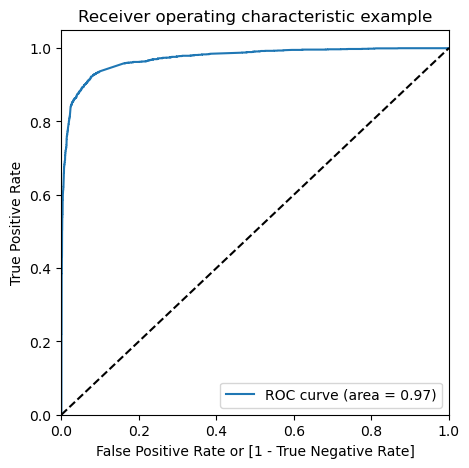

In [177]:

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [178]:
# inference:

#   1) The ROC Curve close to 1 is always bettr. We are getting a value of 0.97 indicating a better predictive model.

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [179]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998667,2873,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999384,6823,1,1,1,1,1,1,1,1,1,1,1
2,0,0.039005,7258,0,1,0,0,0,0,0,0,0,0,0
3,1,0.992047,8327,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014823,5940,0,1,0,0,0,0,0,0,0,0,0


In [180]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)





     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.829902  0.972234  0.743967
0.2   0.2  0.917010  0.933109  0.907290
0.3   0.3  0.922711  0.914178  0.927864
0.4   0.4  0.925245  0.899032  0.941072
0.5   0.5  0.926829  0.874211  0.958598
0.6   0.6  0.926988  0.851073  0.972822
0.7   0.7  0.913367  0.802692  0.980188
0.8   0.8  0.904815  0.773664  0.983998
0.9   0.9  0.885809  0.713504  0.989840


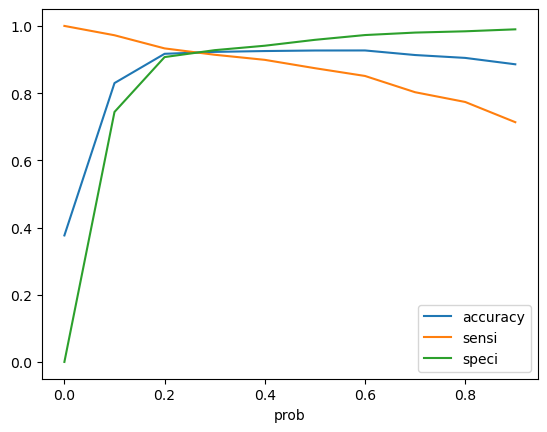

In [181]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### inference: From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [182]:

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.998667,2873,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999384,6823,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.039005,7258,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.992047,8327,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.014823,5940,0,1,0,0,0,0,0,0,0,0,0,0


In [183]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.998667,2873,1,100
1,1,0.999384,6823,1,100
2,0,0.039005,7258,0,4
3,1,0.992047,8327,1,99
4,0,0.014823,5940,0,1


In [184]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)



0.9227114349065568

In [185]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3653,  284],
       [ 204, 2173]], dtype=int64)

In [186]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [187]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9141775347076146

In [188]:
# Let us calculate specificity
TN / float(TN+FP)

0.9278638557277115

In [189]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.07213614427228854


In [190]:
# Positive predictive value  precision
print (TP / float(TP+FP))

0.8844118844118845


In [191]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9471091521908219


### Observation:
the model seems to be perform better. The ROC curve value is 0.97, which is very good. We have the following values for the Train Data:
Train Data: 
Accuracy : 92.27%
Sensitivity : 91.41%
Specificity : 88.44%

## Precision and Recall

In [192]:
#Lprecision##### Precision
#TP / TP + FP

In [193]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.927264614011602

##### Recall
TP / TP + FN

In [194]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8742111905763568

Using sklearn utilities for the same

In [195]:
from sklearn.metrics import precision_score, recall_score

In [196]:

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8844118844118845

In [197]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9141775347076146

### Precision and recall tradeoff

In [198]:
from sklearn.metrics import precision_recall_curve

In [199]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted


(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    1
 6313    1
 Name: Converted, Length: 6314, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    1
 6313    1
 Name: final_Predicted, Length: 6314, dtype: int64)

In [200]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)



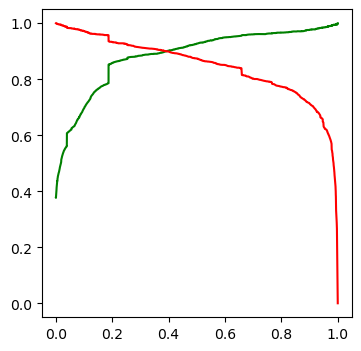

In [201]:
plt.figure(figsize=(4,4))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [202]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

#X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,What is your current occupation_Housewife,What is your current occupation_Other occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5130,-1.067817,-0.874028,-1.131710,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6929,0.606681,-0.820864,1.300957,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1484,0.271781,-0.644872,0.814423,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
6519,-0.398018,2.024341,-0.158643,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7472,-0.398018,1.666857,-0.158643,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [203]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,What is your current occupation_Working Professional
5130,-0.874028,0,0,0,0,0,0,0,1,0,0,1,0
6929,-0.820864,0,0,0,0,0,0,0,0,0,0,0,0
1484,-0.644872,0,0,0,0,1,0,0,0,0,1,1,0
6519,2.024341,0,0,0,0,1,0,0,0,0,1,0,0
7472,1.666857,0,0,0,0,0,1,0,0,0,1,0,0


In [204]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [205]:
y_test_pred = res.predict(X_test_sm)

In [206]:
y_test_pred[:10]

5130    0.039005
6929    0.069746
1484    0.004061
6519    0.291568
7472    0.998657
7920    0.094637
3962    0.186994
6135    0.039005
8701    0.937686
5461    0.997761
dtype: float64

In [207]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [208]:
# Let's see the head
y_pred_1.head()

,0
5130,0.039005
6929,0.069746
1484,0.004061
6519,0.291568
7472,0.998657


In [209]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [210]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [211]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [212]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [213]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5130,0.039005
1,0,6929,0.069746
2,0,1484,0.004061
3,0,6519,0.291568
4,1,7472,0.998657


In [214]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5130,0.039005
1,0,6929,0.069746
2,0,1484,0.004061
3,0,6519,0.291568
4,1,7472,0.998657


In [215]:

# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [216]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5130,0,0.039005,4
1,6929,0,0.069746,7
2,1484,0,0.004061,0
3,6519,0,0.291568,29
4,7472,1,0.998657,100


In [217]:
#y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [218]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [219]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5130,0,0.039005,4,0
1,6929,0,0.069746,7,0
2,1484,0,0.004061,0,0
3,6519,0,0.291568,29,0
4,7472,1,0.998657,100,1


In [220]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9227642276422764

In [221]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1555,  103],
       [ 106,  942]], dtype=int64)

In [222]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [223]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.898854961832061

In [224]:
# Let us calculate specificity
TN / float(TN+FP)

0.9378769601930036

In [225]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9014354066985646

In [226]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.898854961832061

## Overall Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.27%
Sensitivity : 89.88%
Specificity : 90.14%

## Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 92.27%
Sensitivity : 91.41%
Specificity : 88.44%
Test Data: 
Accuracy : 92.27%
Sensitivity : 89.88%
Specificity : 90.14%


The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## top features to be considered

In [227]:
#Selecting the coefficients of the selected features from our final model excluding the intercept

new_params = res.params[1:]
new_params.sort_values()

Tags_Ringing                                           -3.492898
Tags_Other_Tags                                        -2.476841
Tags_Interested in other courses                       -1.952868
Last Notable Activity_Modified                         -1.734606
What is your current occupation_Working Professional    1.037778
Total Time Spent on Website                             1.078967
Lead Source_Olark Chat                                  1.178290
Lead Origin_Lead Add Form                               2.048130
Last Activity_SMS Sent                                  2.125826
Lead Source_Welingak Website                            3.479142
Tags_Will revert after reading the email                4.392414
Tags_Lost to EINS                                       5.918840
Tags_Closed by Horizzon                                 7.252057
dtype: float64

## top features to be considered

What is your current occupation_Working Professional    
Total Time Spent on Website                     
Lead Source_Olark Chat                                  
Lead Origin_Lead Add Form                               
Last Activity_SMS Sent                                  
Lead Source_Welingak Website                            
Tags_Will revert after reading the email                
Tags_Lost to EINS                                       
Tags_Closed by Horizzon